<a href="https://colab.research.google.com/github/Vishal9199/SmartBridge-Externship-ADS/blob/main/ADS_WEEK2_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADS Assignment 2**

Name : Vishal Kumar Mahatha

Reg. No. : 20BRS1168

Campus : VIT Chennai

# Titanic Ship Case Study
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
 One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
 Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper- class.
The problem associated with the Titanic dataset is to predict whether a passenger survived the disaster or not. The dataset contains various features such as passenger class, age, gender, cabin, fare, and whether the passenger had any siblings or spouses on board. These features can be used to build a predictive model to determine the likelihood of a passenger surviving the disaster. The dataset offers opportunities for feature engineering, data visualization, and model selection, making it a valuable resource for developing and testing data analysis and machine learning skills.

1. Link to download dataset.
https://drive.google.com/file/d/190t0KiKqSdbFl-o_6r3S9Tvwo2mHzrcB/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2. Load the dataset.

In [ ]:
titanic = pd.read_csv('/content/titanic.csv')

In [ ]:
titanic.insert(0, 'Index', range(1, len(titanic) + 1))

In [ ]:
titanic.head()

,Index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#Checking for Nan values in features excluding PassengerId, Name
print('Nan values exist in')
for col in [titanic.columns[i] for i in range(0, len(titanic.columns))]: #[1,2,4,5,6,7,8,9,10,11]]:
    print(col,':', any(titanic[col].isna()))

Nan values exist in
Index : False
survived : False
pclass : False
sex : False
age : True
sibsp : False
parch : False
fare : False
embarked : True
class : False
who : False
adult_male : False
deck : True
embark_town : True
alive : False
alone : False


In [ ]:
titanic['age'] = titanic['age'].fillna('nan')

print(len(titanic[titanic['age'] == 'nan']['age']))

177


In [ ]:
titanic['embarked'] = titanic['embarked'].fillna('nan')

print(len(titanic[titanic['embarked'] == 'nan']['embarked']))

2


In [ ]:
titanic['deck'] = titanic['deck'].fillna('nan')

print(len(titanic[titanic['deck'] == 'nan']['deck']))

688


In [ ]:
titanic.head()

,Index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,nan,Southampton,no,False
1,2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,nan,Southampton,yes,True
3,4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,nan,Southampton,no,True


3. Perform Below Visualizations.

● Univariate Analysis

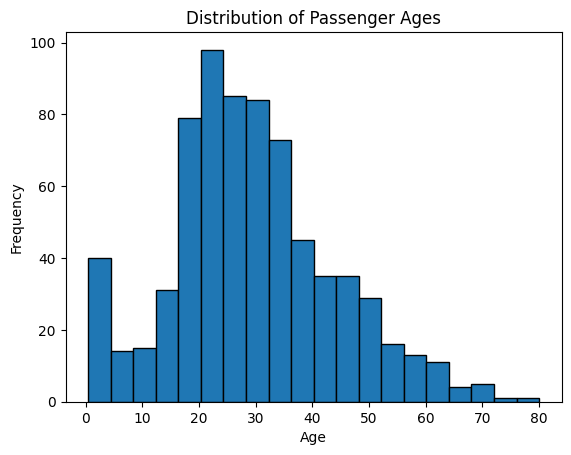

In [ ]:
# Extract Age column
age_data = titanic['age']

# Clean the data (remove missing values)
age_data = age_data.dropna()  # Remove rows with missing values

# Convert age_data to numeric (if necessary)
age_data = age_data.astype(float)  # Convert to float data type

# Create histogram
plt.hist(age_data, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')
plt.show()


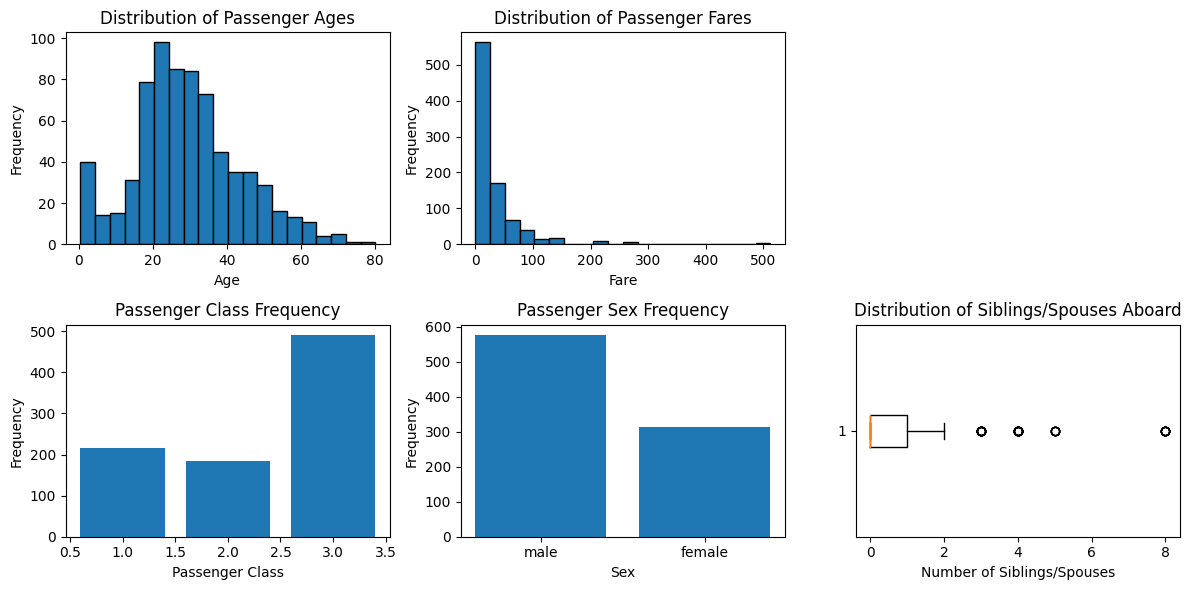

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Extract the desired columns
age_data = titanic['age']
fare_data = titanic['fare']
class_data = titanic['pclass']
sex_data = titanic['sex']
sibsp_data = titanic['sibsp']

# Clean the data (handle missing values, etc.)
age_data = pd.to_numeric(age_data, errors='coerce')
fare_data = pd.to_numeric(fare_data, errors='coerce')

# Remove missing values
age_data = age_data.dropna()
fare_data = fare_data.dropna()

# Create histograms for Age and Fare
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(age_data, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')

plt.subplot(2, 3, 2)
plt.hist(fare_data, bins=20, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Fares')

# Create bar charts for Pclass and Sex
plt.subplot(2, 3, 4)
class_counts = class_data.value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.title('Passenger Class Frequency')

plt.subplot(2, 3, 5)
sex_counts = sex_data.value_counts()
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Passenger Sex Frequency')

# Create a box plot for SibSp
plt.subplot(2, 3, 6)
plt.boxplot(sibsp_data, vert=False)
plt.xlabel('Number of Siblings/Spouses')
plt.title('Distribution of Siblings/Spouses Aboard')

plt.tight_layout()
plt.show()


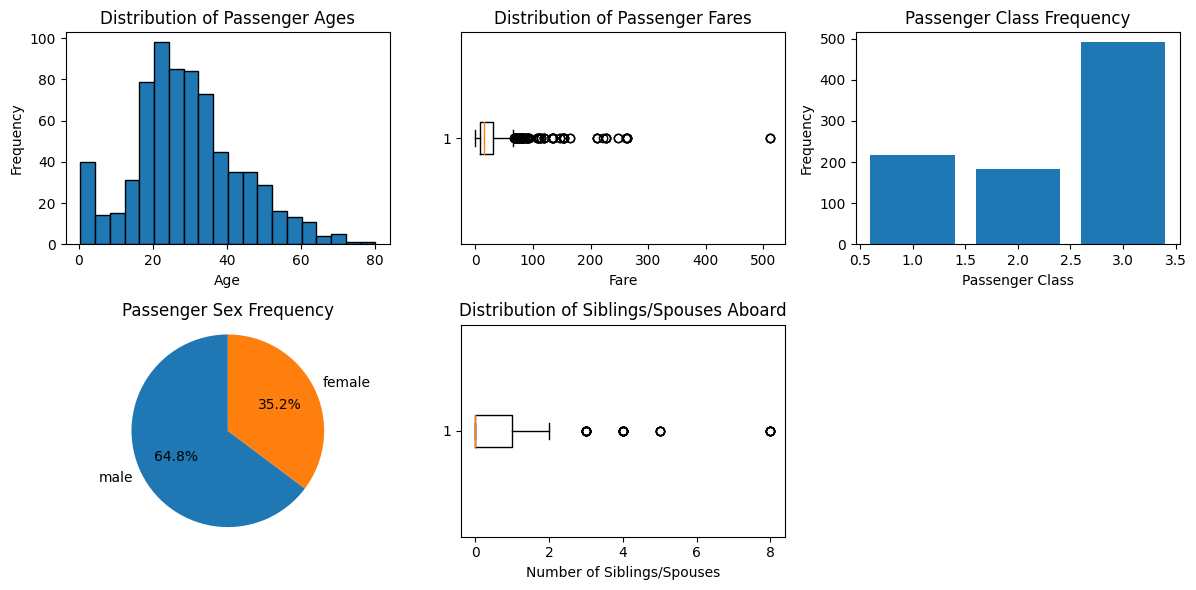

In [ ]:
# Extract the desired columns
age_data = titanic['age']
fare_data = titanic['fare']
class_data = titanic['pclass']
sex_data = titanic['sex']
sibsp_data = titanic['sibsp']

# Clean the data (handle missing values, etc.)
age_data = age_data.dropna()
fare_data = fare_data.dropna()

# Create histograms for Age and Fare
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(age_data, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')

plt.subplot(2, 3, 2)
plt.boxplot(fare_data, vert=False)
plt.xlabel('Fare')
plt.title('Distribution of Passenger Fares')

# Create bar chart for Pclass
plt.subplot(2, 3, 3)
class_counts = class_data.value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.title('Passenger Class Frequency')

# Create a pie chart for Sex
plt.subplot(2, 3, 4)
sex_counts = sex_data.value_counts()
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Passenger Sex Frequency')

# Create a box plot for SibSp
plt.subplot(2, 3, 5)
plt.boxplot(sibsp_data, vert=False)
plt.xlabel('Number of Siblings/Spouses')
plt.title('Distribution of Siblings/Spouses Aboard')

plt.tight_layout()
plt.show()

● Bi - Variate Analysis

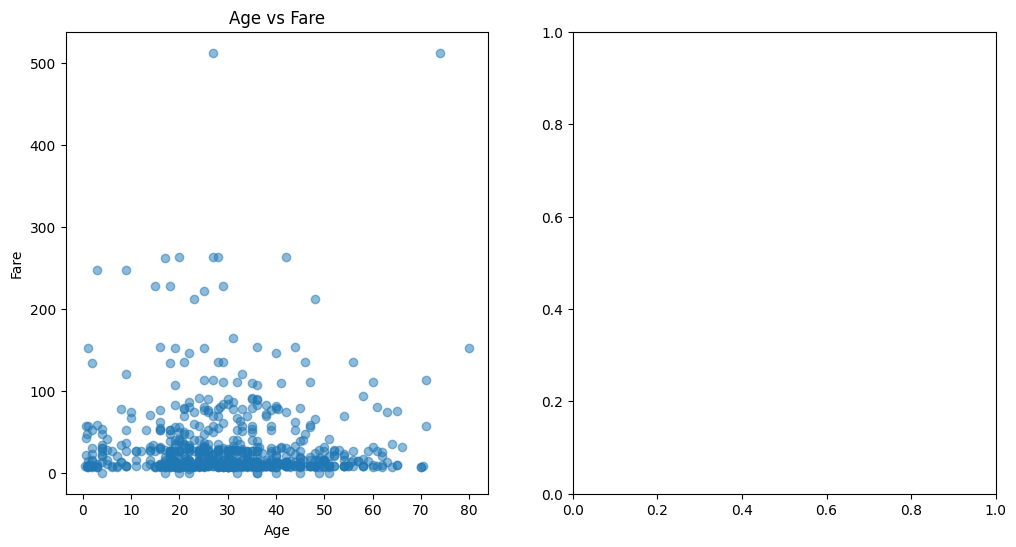

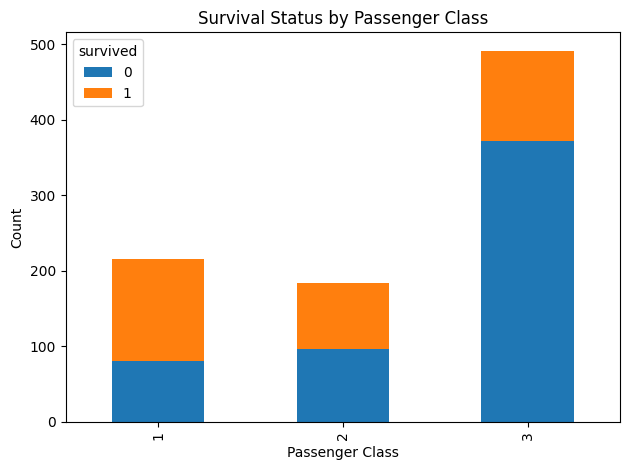

In [ ]:
#titanic = pd.read_csv('titanic.csv')

# Extract the desired columns
age_data = titanic['age']
fare_data = titanic['fare']
class_data = titanic['pclass']
survived_data = titanic['survived']

# Clean the data (handle missing values, etc.)
age_data = age_data.dropna()
fare_data = fare_data.dropna()

# Ensure both age_data and fare_data have the same length
min_length = min(len(age_data), len(fare_data))
age_data = age_data[:min_length]
fare_data = fare_data[:min_length]

# Create a scatter plot for Age vs Fare
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(age_data, fare_data, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')

# Create a stacked bar chart for Pclass and Survival
plt.subplot(1, 2, 2)
survived_counts = titanic.groupby(['pclass', 'survived']).size().unstack()
survived_counts.plot(kind='bar', stacked=True)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Status by Passenger Class')

plt.tight_layout()
plt.show()

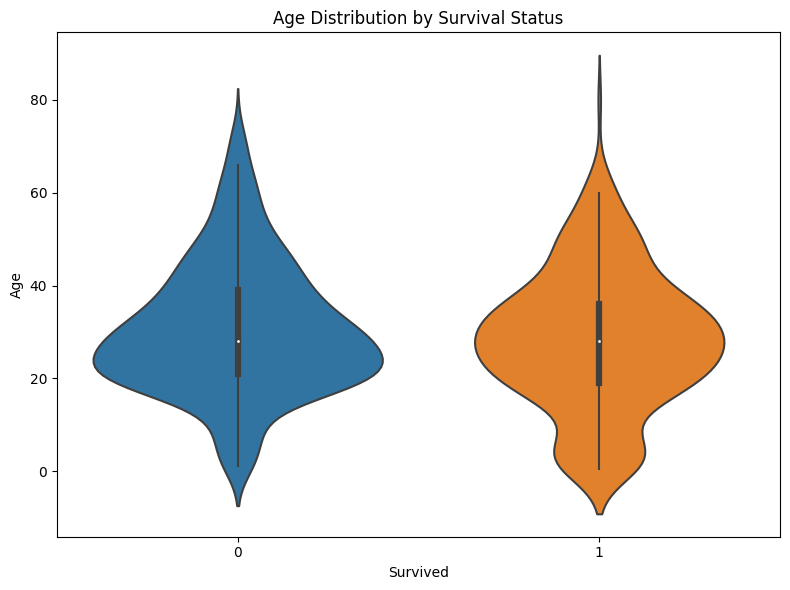

In [ ]:
# Extract the desired columns
age_data = titanic['age']
survived_data = titanic['survived']

# Clean the data (handle missing values, etc.)
age_data = age_data.dropna()

# Create a violin plot for Age and Survival
plt.figure(figsize=(8, 6))
sns.violinplot(x=survived_data, y=age_data)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution by Survival Status')

plt.tight_layout()
plt.show()


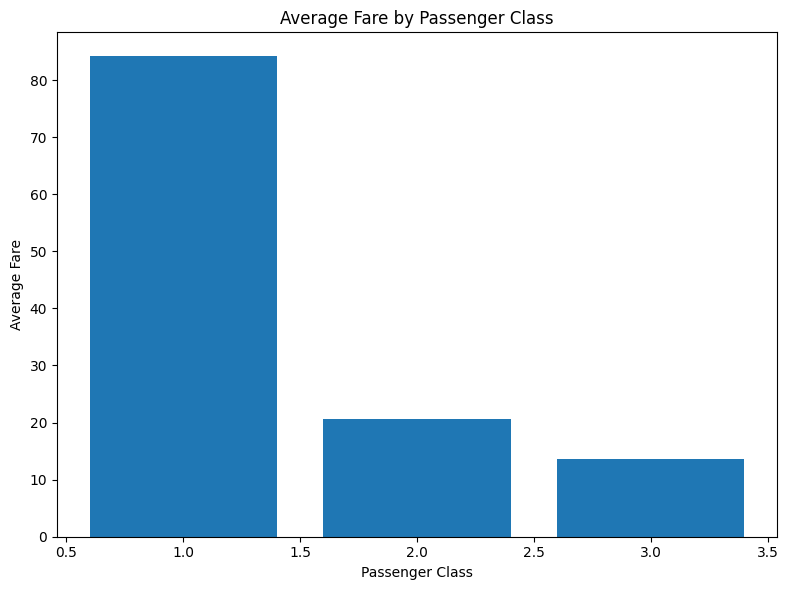

In [ ]:
# Extract the desired columns
class_data = titanic['pclass']
fare_data = titanic['fare']

# Clean the data (handle missing values, etc.)
fare_data = fare_data.dropna()

# Calculate the average fare for each passenger class
avg_fare_by_class = titanic.groupby('pclass')['fare'].mean()

# Create a grouped bar chart for Pclass and Fare
plt.figure(figsize=(8, 6))
plt.bar(avg_fare_by_class.index, avg_fare_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.title('Average Fare by Passenger Class')

plt.tight_layout()
plt.show()

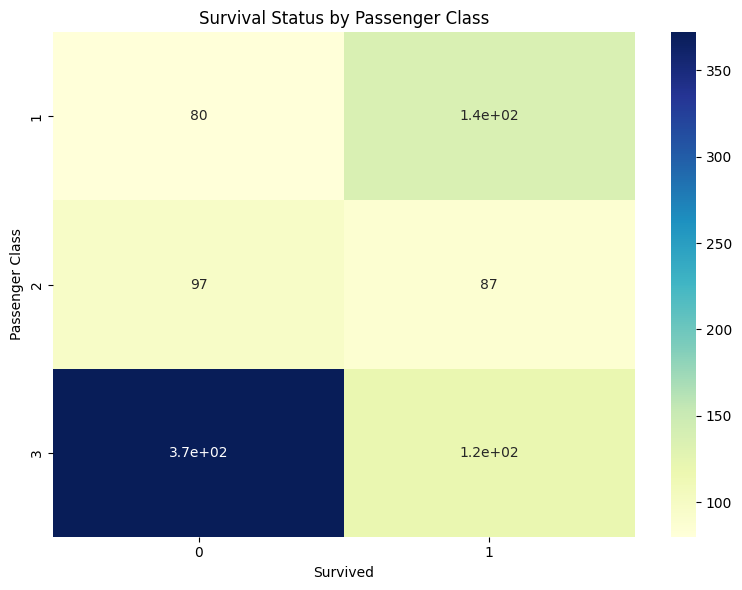

In [ ]:
# Create a cross-tabulation between Pclass and Survived
cross_tab = pd.crosstab(titanic['pclass'], titanic['survived'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.xlabel('Survived')
plt.ylabel('Passenger Class')
plt.title('Survival Status by Passenger Class')

plt.tight_layout()
plt.show()


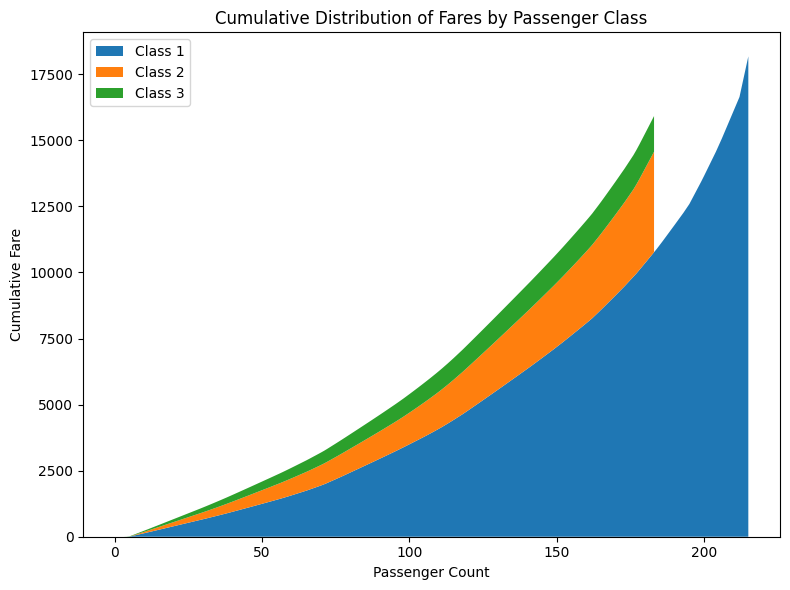

In [ ]:
# Extract the desired columns
class_data = titanic['pclass']
fare_data = titanic['fare']

# Clean the data (handle missing values, etc.)
fare_data = fare_data.dropna()

# Create cumulative distributions of fares for each passenger class
class1_fares = fare_data[class_data == 1].sort_values().cumsum()
class2_fares = fare_data[class_data == 2].sort_values().cumsum()
class3_fares = fare_data[class_data == 3].sort_values().cumsum()

# Pad the shorter arrays with NaN values to align their lengths
max_length = max(len(class1_fares), len(class2_fares), len(class3_fares))
class1_fares = np.pad(class1_fares, (0, max_length - len(class1_fares)), mode='constant', constant_values=np.nan)
class2_fares = np.pad(class2_fares, (0, max_length - len(class2_fares)), mode='constant', constant_values=np.nan)
class3_fares = np.pad(class3_fares, (0, max_length - len(class3_fares)), mode='constant', constant_values=np.nan)

# Create a stacked area chart
plt.figure(figsize=(8, 6))
plt.stackplot(range(max_length), class1_fares, class2_fares, class3_fares, labels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Passenger Count')
plt.ylabel('Cumulative Fare')
plt.title('Cumulative Distribution of Fares by Passenger Class')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


● Multi - Variate Analysis

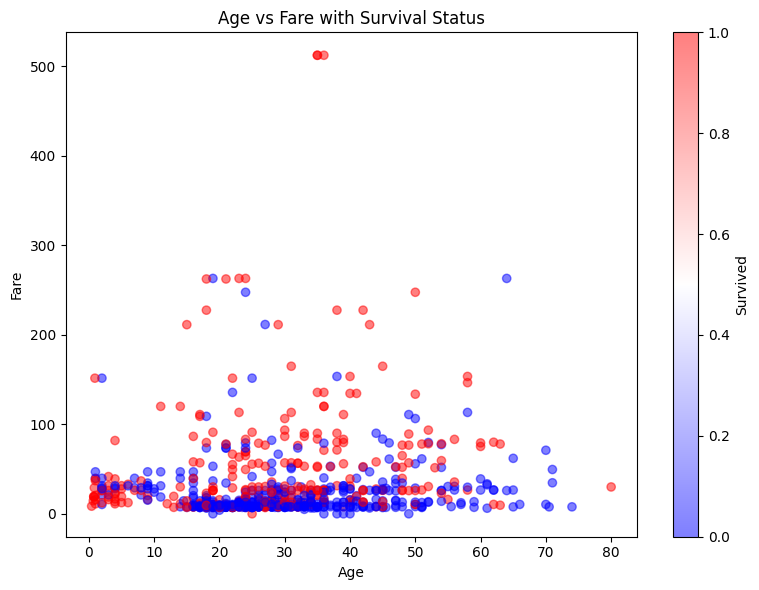

In [ ]:
# Extract the desired columns
age_data = titanic['age']
fare_data = titanic['fare']
survived_data = titanic['survived']

# Clean the data (handle missing values, etc.)
titanic_cleaned = titanic.dropna(subset=['age', 'fare'])
age_data = titanic_cleaned['age']
fare_data = titanic_cleaned['fare']
survived_data = titanic_cleaned['survived']

# Create a scatter plot with color encoding
plt.figure(figsize=(8, 6))
plt.scatter(age_data, fare_data, c=survived_data, cmap='bwr', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare with Survival Status')
plt.colorbar(label='Survived')

plt.tight_layout()
plt.show()


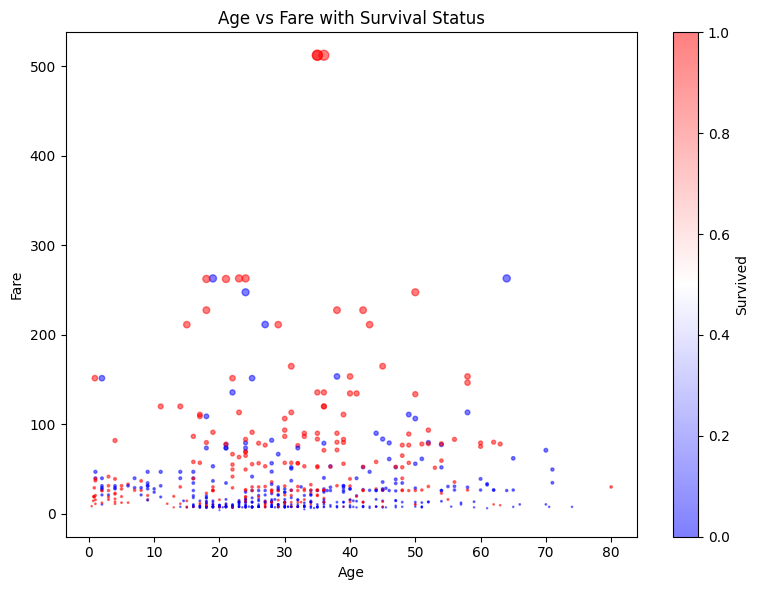

In [ ]:
# Extract the desired columns
age_data = titanic['age']
fare_data = titanic['fare']
survived_data = titanic['survived']

# Clean the data (handle missing values, etc.)
titanic_cleaned = titanic.dropna(subset=['age', 'fare'])
age_data = titanic_cleaned['age']
fare_data = titanic_cleaned['fare']
survived_data = titanic_cleaned['survived']

# Create a scatter plot with color and size encoding
plt.figure(figsize=(8, 6))
plt.scatter(age_data, fare_data, c=survived_data, cmap='bwr', alpha=0.5, s=(titanic_cleaned['fare'] * 0.1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare with Survival Status')
plt.colorbar(label='Survived')

plt.tight_layout()
plt.show()

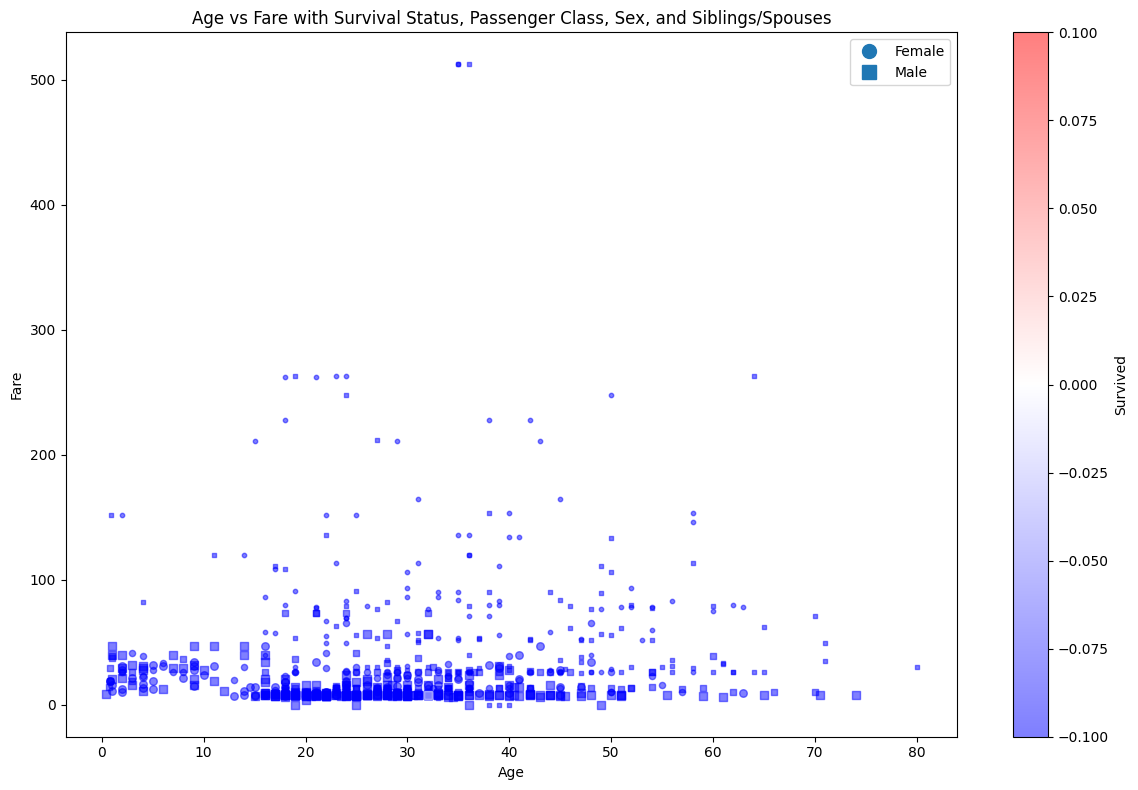

In [ ]:
import matplotlib.pyplot as plt

# Extract the desired columns
age_data = titanic['age']
fare_data = titanic['fare']
class_data = titanic['pclass']
survived_data = titanic['survived']
sex_data = titanic['sex']
sibsp_data = titanic['sibsp']

# Clean the data (handle missing values, etc.)
titanic_cleaned = titanic.dropna(subset=['age', 'fare', 'sex', 'sibsp'])
age_data = titanic_cleaned['age']
fare_data = titanic_cleaned['fare']
class_data = titanic_cleaned['pclass'].astype(int)  # Convert to integer
survived_data = titanic_cleaned['survived']
sex_data = titanic_cleaned['sex']
sibsp_data = titanic_cleaned['sibsp'].astype(int)  # Convert to integer

# Create a mapping for marker styles based on sex
sex_marker_map = {'female': 'o', 'male': 's'}

# Create a scatter plot with color, size, and marker encoding
plt.figure(figsize=(12, 8))

for age, fare, survived, passenger_class, sex in zip(age_data, fare_data, survived_data, class_data, sex_data):
    marker_style = sex_marker_map[sex]
    plt.scatter(age, fare, c=survived, cmap='bwr', alpha=0.5, s=passenger_class * 10, marker=marker_style)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare with Survival Status, Passenger Class, Sex, and Siblings/Spouses')
plt.colorbar(label='Survived')
plt.legend(handles=[
    plt.Line2D([], [], marker='o', markersize=10, label='Female', linestyle='None'),
    plt.Line2D([], [], marker='s', markersize=10, label='Male', linestyle='None')
])

plt.tight_layout()
plt.show()

4. Perform descriptive statistics on the dataset.

In [ ]:
import pandas as pd

# Load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Calculate descriptive statistics
descriptive_stats = titanic.describe()

# Display the descriptive statistics
print(descriptive_stats)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


5. Handle the Missing values.

In [ ]:
# Drop rows with missing values
titanic_cleaned = titanic.dropna()

# Drop columns with missing values
titanic_cleaned = titanic.dropna(axis=1)

In [ ]:
# Fill missing values with mean
mean_age = titanic['age'].mean()
titanic['age'] = titanic['age'].fillna(mean_age)

In [ ]:
# Fill missing values with a specific category
titanic['deck'] = titanic['deck'].fillna('Unknown')

# Fill missing values with mode
mode_embarked = titanic['embarked'].mode()[0]
titanic['embarked'] = titanic['embarked'].fillna(mode_embarked)

6. Find the outliers and replace the outliers.

In [ ]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Select the numerical columns for outlier detection and replacement
numerical_columns = ['age', 'fare']

# Calculate the IQR for each numerical column
Q1 = titanic[numerical_columns].quantile(0.25)
Q3 = titanic[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers (e.g., 1.5 times the IQR)
outlier_threshold = 1.5

# Find the outliers in each numerical column
outliers = (titanic[numerical_columns] < (Q1 - outlier_threshold * IQR)) | (titanic[numerical_columns] > (Q3 + outlier_threshold * IQR))

# Replace the outliers with a suitable value (e.g., the median)
titanic[outliers] = np.nan
titanic_cleaned = titanic.fillna(titanic.median())

# Display the updated dataset
print(titanic_cleaned)

     survived  pclass     sex   age  sibsp  parch    fare embarked   class  \
0           0       3    male  22.0      1      0   7.250        S   Third   
1           1       1  female  38.0      1      0  13.000        C   First   
2           1       3  female  26.0      0      0   7.925        S   Third   
3           1       1  female  35.0      1      0  53.100        S   First   
4           0       3    male  35.0      0      0   8.050        S   Third   
..        ...     ...     ...   ...    ...    ...     ...      ...     ...   
886         0       2    male  27.0      0      0  13.000        S  Second   
887         1       1  female  19.0      0      0  30.000        S   First   
888         0       3  female  28.0      1      2  23.450        S   Third   
889         1       1    male  26.0      0      0  30.000        C   First   
890         0       3    male  32.0      0      0   7.750        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      

<ipython-input-26-0ac841e2daae>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_cleaned = titanic.fillna(titanic.median())


7. Check for Categorical columns and perform encoding.

In [ ]:
import pandas as pd

# Load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Identify the categorical columns
categorical_columns = titanic.select_dtypes(include=['object']).columns

# Perform encoding for each categorical column
for column in categorical_columns:
    # Check if the column has missing values
    if titanic[column].isnull().any():
        # If the column has missing values, fill them with a placeholder value
        titanic[column].fillna('Unknown', inplace=True)
    
    # Perform one-hot encoding using pandas get_dummies function
    encoded_columns = pd.get_dummies(titanic[column], prefix=column)
    
    # Add the encoded columns to the dataset
    titanic = pd.concat([titanic, encoded_columns], axis=1)
    
    # Remove the original categorical column from the dataset
    titanic.drop(column, axis=1, inplace=True)

# Display the updated dataset
print(titanic)

     survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0           0       3  22.0      1      0   7.2500        True  False   
1           1       1  38.0      1      0  71.2833       False  False   
2           1       3  26.0      0      0   7.9250       False   True   
3           1       1  35.0      1      0  53.1000       False  False   
4           0       3  35.0      0      0   8.0500        True   True   
..        ...     ...   ...    ...    ...      ...         ...    ...   
886         0       2  27.0      0      0  13.0000        True   True   
887         1       1  19.0      0      0  30.0000       False   True   
888         0       3   NaN      1      2  23.4500       False  False   
889         1       1  26.0      0      0  30.0000        True   True   
890         0       3  32.0      0      0   7.7500        True   True   

     sex_female  sex_male  ...  deck_E  deck_F  deck_G  deck_Unknown  \
0             0         1  ...       0       0     

8. Split the data into dependent and independent variables.

In [ ]:
import pandas as pd

# Load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Split the data into dependent and independent variables
X = titanic.drop('survived', axis=1)  # Independent variables (all columns except 'survived')
y = titanic['survived']  # Dependent variable

# Display the independent variables (X)
print(X)

# Display the dependent variable (y)
print(y)

     pclass     sex   age  sibsp  parch     fare embarked   class    who  \
0         3    male  22.0      1      0   7.2500        S   Third    man   
1         1  female  38.0      1      0  71.2833        C   First  woman   
2         3  female  26.0      0      0   7.9250        S   Third  woman   
3         1  female  35.0      1      0  53.1000        S   First  woman   
4         3    male  35.0      0      0   8.0500        S   Third    man   
..      ...     ...   ...    ...    ...      ...      ...     ...    ...   
886       2    male  27.0      0      0  13.0000        S  Second    man   
887       1  female  19.0      0      0  30.0000        S   First  woman   
888       3  female   NaN      1      2  23.4500        S   Third  woman   
889       1    male  26.0      0      0  30.0000        C   First    man   
890       3    male  32.0      0      0   7.7500        Q   Third    man   

     adult_male deck  embark_town alive  alone  
0          True  NaN  Southampton    n

9. Scale the independent variables.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Split the data into dependent and independent variables
X = titanic.drop('survived', axis=1)  # Independent variables (all columns except 'survived')
y = titanic['survived']  # Dependent variable

# Define the column transformer for encoding and scaling
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['sex', 'pclass']),  # Encode categorical variables
        ('scaler', StandardScaler(), ['age', 'fare', 'sibsp'])  # Scale numerical variables
    ],
    remainder='passthrough'  # Pass through any remaining columns as they are
)

# Apply column transformer to the independent variables
X_scaled = column_transformer.fit_transform(X)

# Display the scaled independent variables
print(X_scaled)

[[0.0 1.0 0.0 ... 'Southampton' 'no' False]
 [1.0 0.0 1.0 ... 'Cherbourg' 'yes' False]
 [1.0 0.0 0.0 ... 'Southampton' 'yes' True]
 ...
 [1.0 0.0 0.0 ... 'Southampton' 'no' False]
 [0.0 1.0 1.0 ... 'Cherbourg' 'yes' True]
 [0.0 1.0 0.0 ... 'Queenstown' 'no' True]]


10. Split the data into training and testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 17)
X_test shape: (179, 17)
y_train shape: (712,)
y_test shape: (179,)
